# **THE TRUTH IS OUT THERE** 

1° Parte: https://www.kaggle.com/leogenzano/ufo-sightings-1-parte-data-preparation<br>
Tomaremos los datos ya limpios de UFO sightings y haremos algunas visualizaciones<br>
Es un registro de avistamientos de OVNI llevado a cabo por National UFO Reporting Center (NUFORC)<br>
Contiene registros de avistamientos desde 1906 hasta 2014<br>

Consideraciones:
* voy a estar utilizando algunas funciones de la libreria funpymodeling, que nos ayuda sobretodo con el analisis exploratorio y la preparación de datos https://pypi.org/project/funpymodeling/
* Este notebook no fue realizado por un experto. Seguramente haya mejores maneras de afrontar las mismas problematicas. Quedo atento a cualquier comentario o sugerencia 

![The kaggle logo][1]
[1]: https://i.pinimg.com/originals/e2/6a/04/e26a047ca4b432efb62f63534ae9e8b9.jpg

# **Comencemos**

**Importamos librerias que vamos a utilizar y cargamos los datos limpios en un dataframe**

In [1]:
pip install funpymodeling

     |████████████████████████████████| 11.6 MB 7.2 MB/s 
     |████████████████████████████████| 215 kB 10.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 7.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pandas-profiling 2.6.0 requires matplotlib>=3.2.0, but you'll have matplotlib 3.1.3 which is incompatible.
osmnx 0.15.1 requires matplotlib>=3.2, but you'll have matplotlib 3.1.3 which is incompatible.
funpymodeling 0.1.7 requires matplotlib<4.0.0,>=3.2.2, but you'll have matplotlib 3.1.3 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from qgrid import show_grid
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import YouTubeVideo
import squarify

In [4]:
# Cargamos los datos ya trabajados
data = pd.read_csv("../input/clean-data-ufo/clean Data UFO (10).csv", sep=",")

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,datetime,0,0.0,0,0.0,69433,object
1,country,0,0.0,0,0.0,164,object
2,state,0,0.0,0,0.0,840,object
3,city,0,0.0,0,0.0,10676,object
4,shape,0,0.0,0,0.0,30,object
5,duration(minutes),0,0.0,0,0.0,533,float64
6,comments,0,0.0,0,0.0,79997,object
7,datePosted,0,0.0,0,0.0,317,object
8,latitude,0,0.0,0,0.0,19451,float64
9,longitude,0,0.0,0,0.0,19454,float64


Veamos como estan distribuidos los países. 

In [6]:
freq_tbl(data['country'])
# como era de esperarse, Estados Unidos tiene el 88% de los registros

,country,frequency,percentage,cumulative_perc
0,USA,70903,0.882636,0.882636
1,Canada,3588,0.044665,0.927301
2,United Kingdom,2387,0.029715,0.957015
3,Australia,633,0.007880,0.964895
4,Mexico,236,0.002938,0.967833
...,...,...,...,...
159,Saint Helena,1,0.000012,0.999950
160,El Salvador,1,0.000012,0.999963
161,Algeria,1,0.000012,0.999975
162,"China, Macao SAR",1,0.000012,0.999988


# Analicemos en que años o en que meses hubo más avistamientos

In [7]:
# vamos a tomar el año, mes, dia y hora a partir de la columna datetime
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
#data['hour'] = pd.DatetimeIndex(data['datetime']).time #este devuelve la hora y minutos
data['hour'] = pd.DatetimeIndex(data['datetime']).hour #este devuelve solo la hora

In [8]:
#data = data.astype({'year': object, "month": object,'day':object,'hour':object})

In [9]:
#declaramos formato global de matplotlib
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

#https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties.set_size

In [10]:
#vamos a hacer divisiones cada 40 años para que sea legible
dt_year_1900_1939= data.loc[(data['year'] >= 1900) & (data['year'] <= 1949)]
dt_year_1940_1979= data.loc[(data['year'] >= 1950) & (data['year'] <= 1979)]
dt_year_1980_2020= data.loc[(data['year'] >= 1980) & (data['year'] <= 2020)]

# 1900-1939<br>
Como diría el canal de youtube 'Te lo resumo..' DATO(s) DE VITAL IMPORTANCIA <br>
Atención con como aumentaron los avistamientos segun:<br>
* 1938: transmisión de radio de "La guerra de los mundos" https://es.wikipedia.org/wiki/La_guerra_de_los_mundos_(radio)
* 1942: la batalla de los Angeles https://es.wikipedia.org/wiki/Batalla_de_Los_%C3%81ngeles_(1942)
* 1947: Incidente Roswell https://es.wikipedia.org/wiki/Caso_Roswell
* 1939-1945: 2° guerra mundial

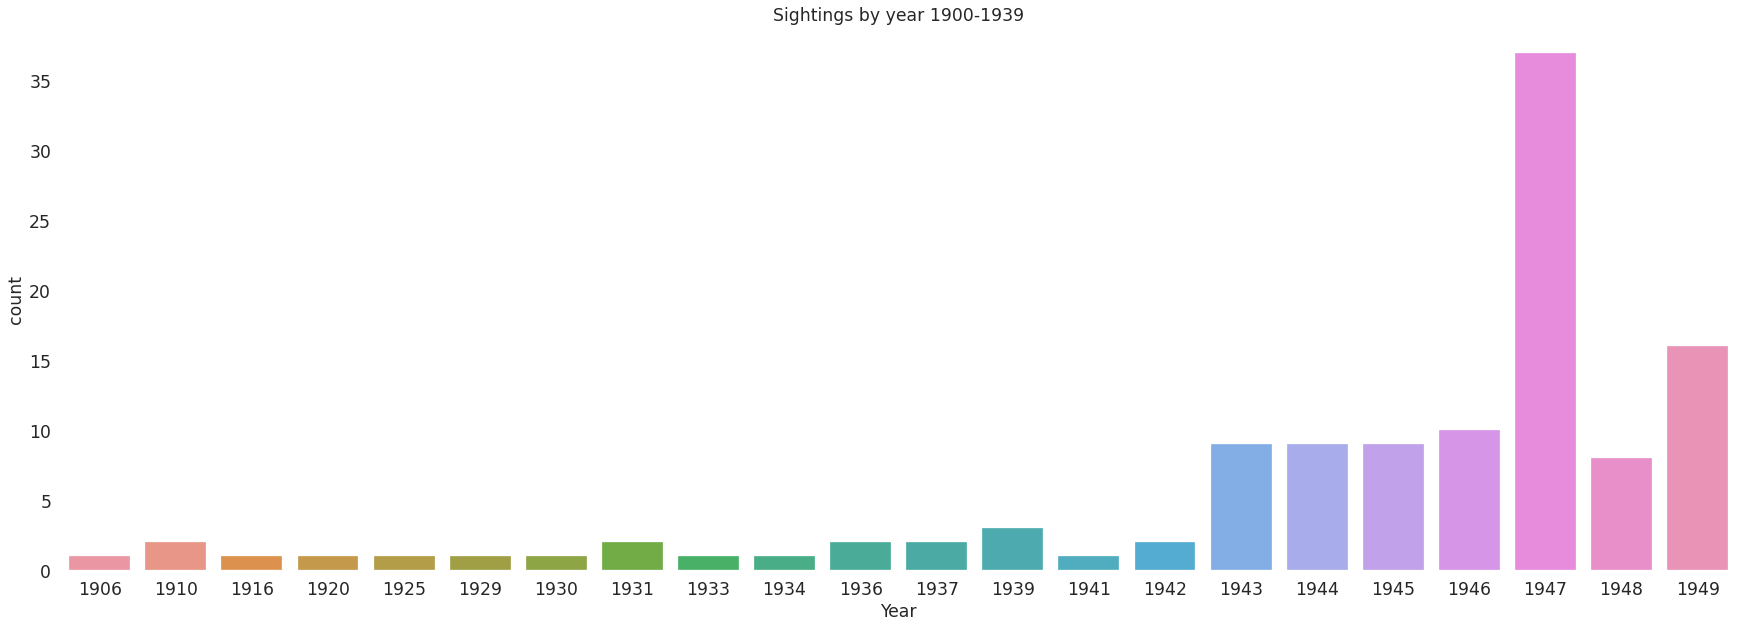

In [11]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1900_1939['year'])
plt.title('Sightings by year 1900-1939')
plt.xlabel('Year')
plt.show()

# 1940-1979

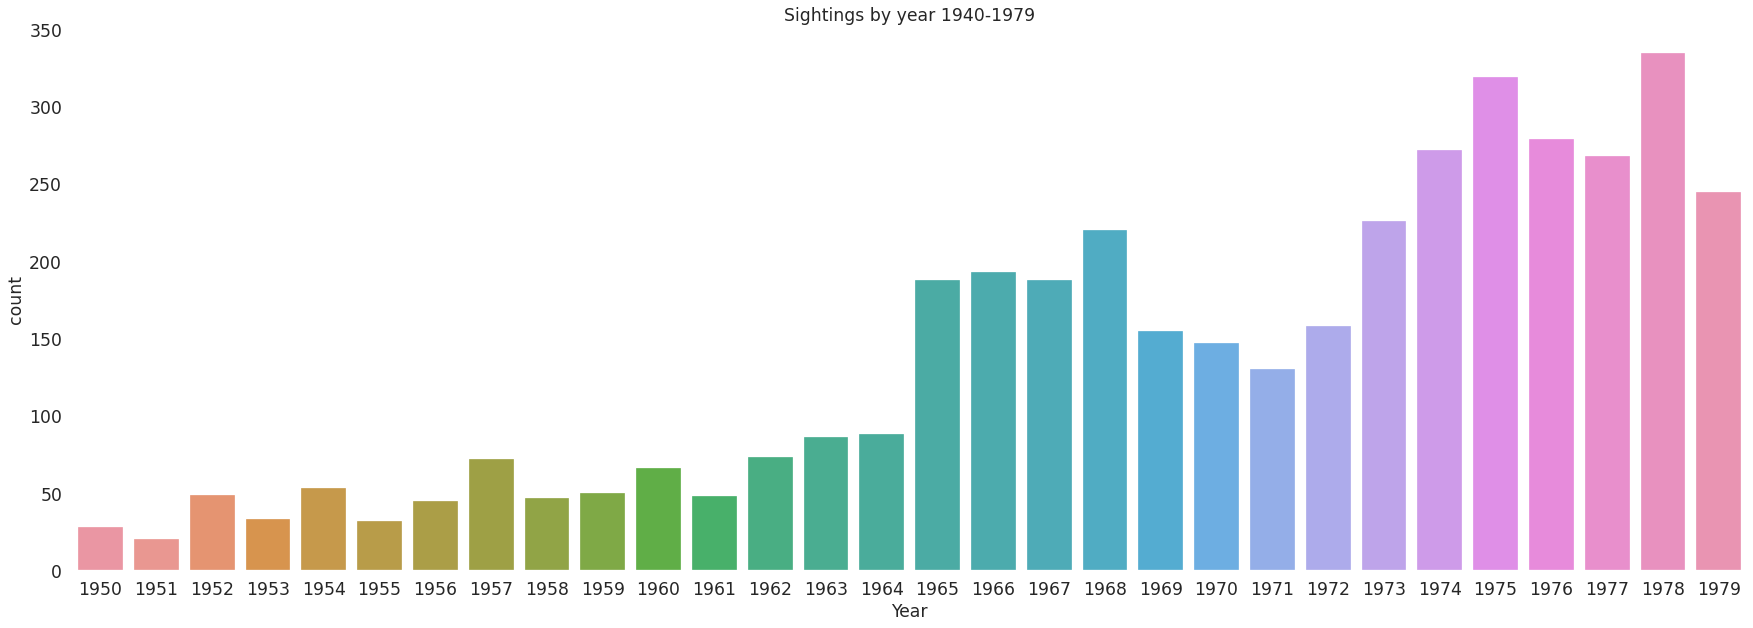

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1940_1979['year'])
plt.title('Sightings by year 1940-1979')
plt.xlabel('Year')
plt.show()

# 1980-2020
DATO(s) DE VITAL IMPORTANCIA 
Atención con como aumentaron los avistamientos segun:
* 1994: Comienzo de una de las series pioneras en generar el famoso "hype", obviamente trata de ovnis: X-files 
* 2012: fin del mundo segun el calendario maya (o fin de una era..) Al final lo habian calculado mal
Oficialmente 2012 se lleva la medalla a la mayor cantidad de avistamientos

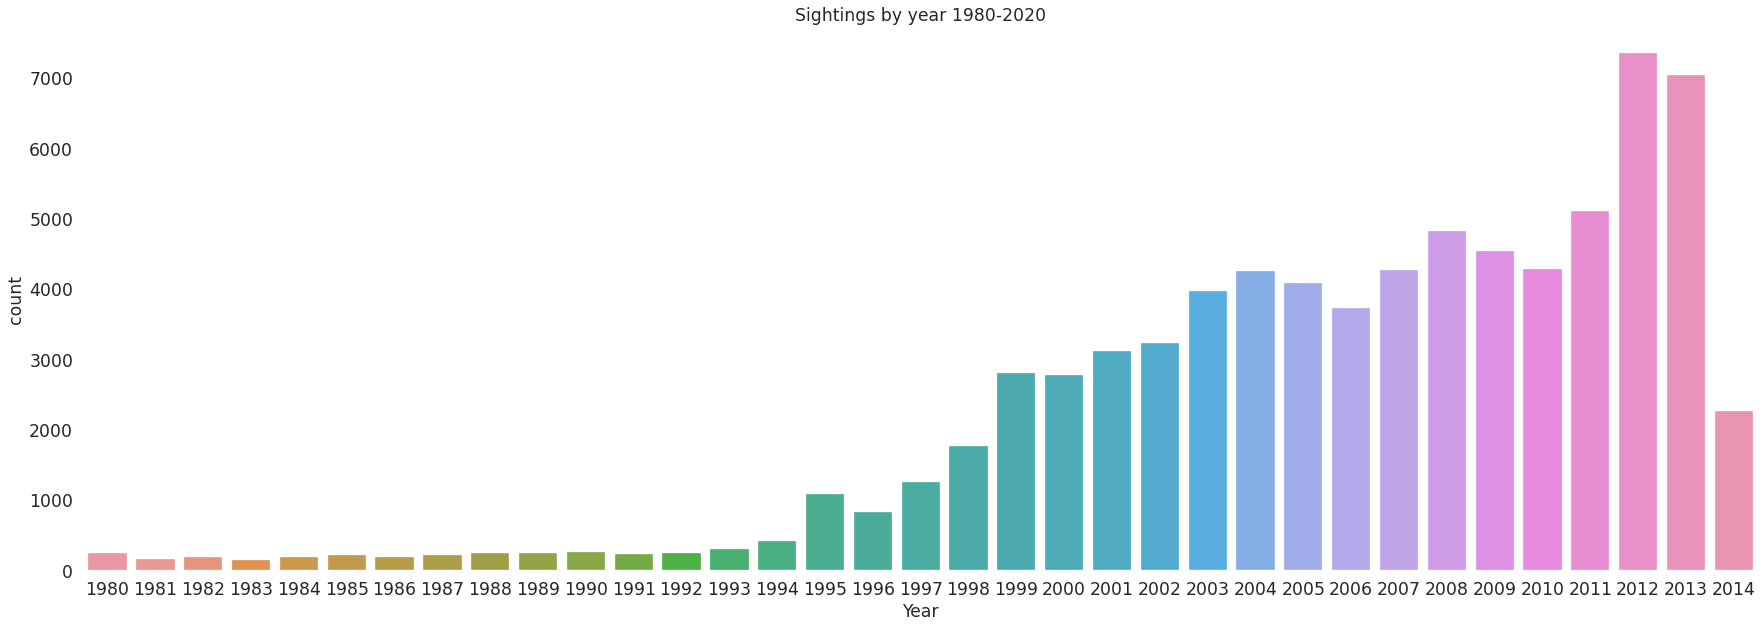

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1980_2020['year'])
plt.title('Sightings by year 1980-2020')
plt.xlabel('Year')
plt.show()

**************************

# ¿Hay algun mes o día en donde los avistamientos aumenten?

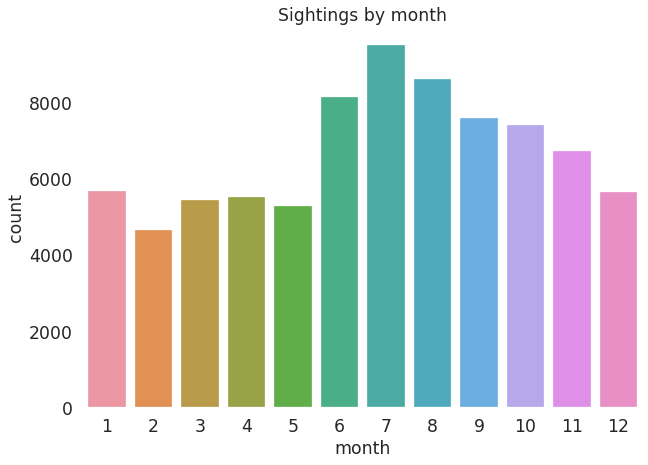

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['month'])
plt.title('Sightings by month')
plt.show()

Nomas de curioso, veamos que pasa con el día y la hora

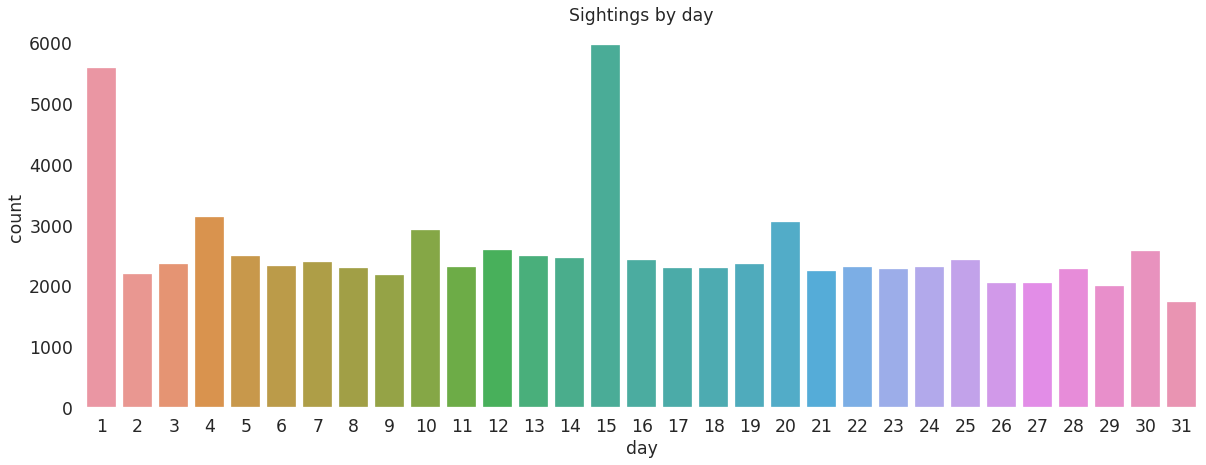

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['day'])
plt.title('Sightings by day')
plt.show()
# Claramente los días 1 y 15 del mes aumenta la actividad. No se me ocurre por qué podría ser

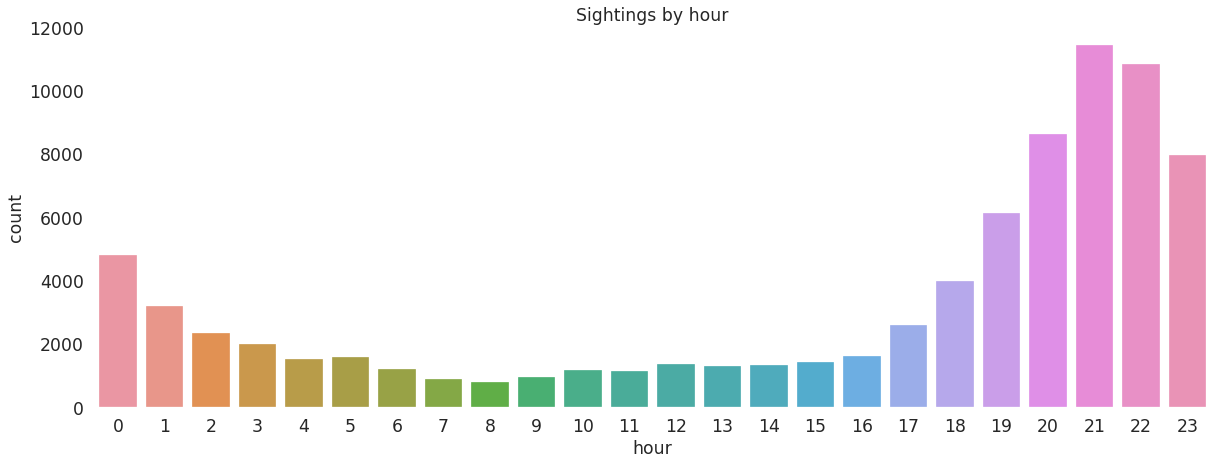

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['hour'])
plt.title('Sightings by hour')
plt.show()
# Esto tiene sentido, a medida que va cayendo la noche, los avistamientos son más comunes. 
# A las 21hs es donde los ovnis más son vistos. Tal vez 
# A partir de las 23hs descienden los avistamientos

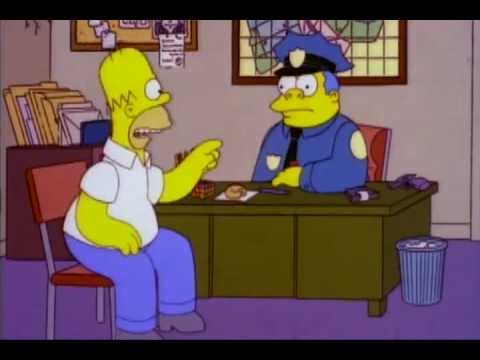

In [17]:
YouTubeVideo('mVZN_movUQo', width=800, height=450)

**************************

# Ese video de los simpsons me hizo pensar algo. ¿Los ovnis aparecen más algun dia de la semana que otro?

In [18]:
data['dayofweek'] = pd.DatetimeIndex(data['datetime']).dayofweek

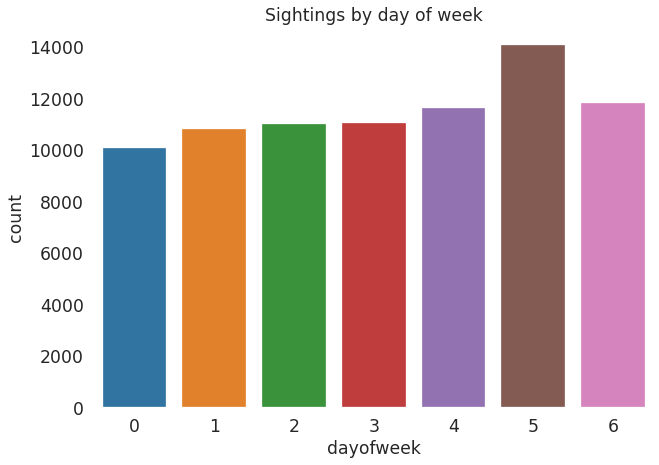

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['dayofweek'])
plt.title('Sightings by day of week')
plt.show()
#Monday= 0 , Sunday = 6

Bueno en este caso el día de la semana en que más registros hay es el sabado (día 5)

**************************

![The kaggle logo][2]
[2]: https://postercity.com.ar/wp-content/uploads/2017/07/I-Want-To-Believe.jpg

# Veamos un poco de Argentina

In [20]:
freq_tbl(data[data.country == "Argentina"].state)
# 24 registros en más de 100 años... obviamente esto es lo registrado por la NUFORC, que es de otro pais.
# estaria bueno obtener datos de algun organismo de acá

,state,frequency,percentage,cumulative_perc
0,Buenos Aires F.D.,11,0.458333,0.458333
1,Buenos Aires,7,0.291667,0.750000
2,Misiones,2,0.083333,0.833333
3,Cordoba,1,0.041667,0.875000
4,Mendoza,1,0.041667,0.916667
5,Jujuy,1,0.041667,0.958333
6,Catamarca,1,0.041667,1.000000


**************************

# Palabras más usadas por quienes reportaron

Algo super interesante que vi en este notebook:
https://www.kaggle.com/enginacikgoz/ufo-sightings-analysis <br>
Una nube de palabras, en donde vemos las más utilizadas por quienes reportaron los avistamientos

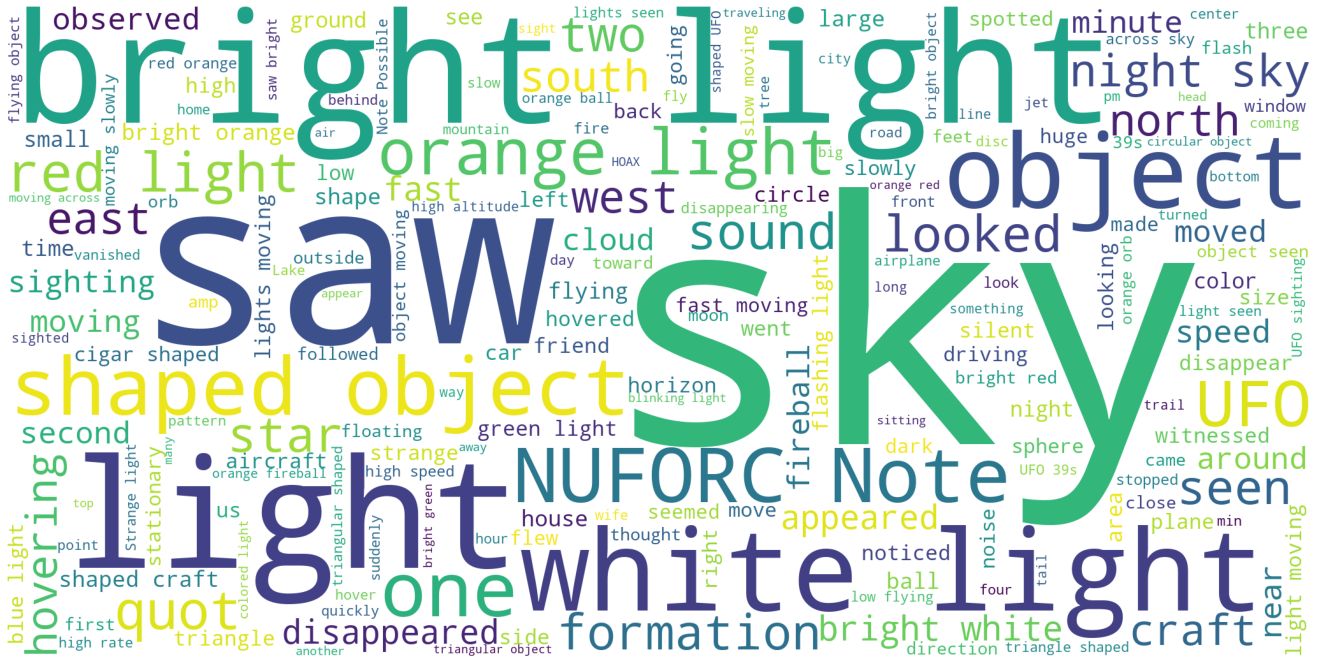

In [21]:
from wordcloud import WordCloud
words = [i for i in data.comments]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

Se ve mucho palabras como (en español): luces, cielo, brillo, volador, nave, forma.

In [22]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,datetime,0,0.0,0,0.000000,69433,object
1,country,0,0.0,0,0.000000,164,object
2,state,0,0.0,0,0.000000,840,object
3,city,0,0.0,0,0.000000,10676,object
4,shape,0,0.0,0,0.000000,30,object
5,duration(minutes),0,0.0,0,0.000000,533,float64
6,comments,0,0.0,0,0.000000,79997,object
7,datePosted,0,0.0,0,0.000000,317,object
8,latitude,0,0.0,0,0.000000,19451,float64
9,longitude,0,0.0,0,0.000000,19454,float64


# ¿Cuales son las formas de OVNI avistadas más comunes?

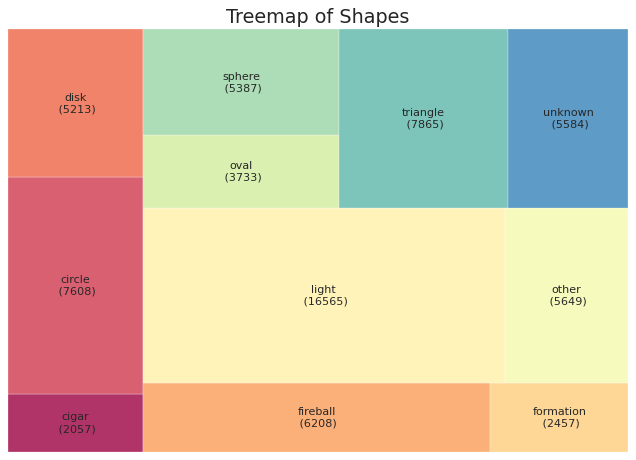

In [23]:
#filtro los datos para que el grafico tenga más sentido. Solo voy a mostrar las formas que tengan al menos 2000 registros
data_treemap = data.groupby("shape").filter(lambda x: len(x) > 2000)

# Prepare Data
df = data_treemap.groupby('shape').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Shapes')
plt.axis('off')
plt.show()

In [24]:
import plotly.figure_factory as ff

fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [25]:
import plotly.graph_objs as go
import plotly.offline as py

In [26]:
states_us = data[data.country == "USA"]["state"].value_counts().index
states_us_ratio = data[data.country == "USA"]["state"].value_counts().values
states_us = [i.upper() for i in states_us]


In [27]:
datadict = [
        dict(
        type='choropleth',
        locations = states_us,
        z = states_us_ratio,
        locationmode = 'USA-states', #"ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "times",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Sight rates by states")
        )
        ]

layout = dict(
        title = 'UFO sight rates from USA',
        geo = dict(
            scope='usa', #scope del mapa "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='albers usa' ),# equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
              )


fig = go.Figure(data=datadict, layout=layout)
py.iplot(fig)


In [28]:
countries = data["country"].value_counts().index #que estados
countries_ratio = data["country"].value_counts().values #cuanto aparece cada estado
countries = [i.upper() for i in countries]


In [29]:
countries

['USA',
 'CANADA',
 'UNITED KINGDOM',
 'AUSTRALIA',
 'MEXICO',
 'INDIA',
 'GERMANY',
 'NETHERLANDS',
 'BRAZIL',
 'NEW ZEALAND',
 'SOUTH AFRICA',
 'SPAIN',
 'FRANCE',
 'PHILIPPINES',
 'IRELAND',
 'JAPAN',
 'MALAYSIA',
 'PR',
 'PORTUGAL',
 'NORWAY',
 'GREECE',
 'BELGIUM',
 'CHINA',
 'SWEDEN',
 'ITALY',
 'PAKISTAN',
 'ROMANIA',
 'ISRAEL',
 'TURKEY',
 'IRAN',
 'COLOMBIA',
 'IRAQ',
 'CROATIA',
 'FINLAND',
 'VENEZUELA',
 'THAILAND',
 'CYPRUS',
 'ARGENTINA',
 'CHILE',
 'UNITED ARAB EMIRATES',
 'SINGAPORE',
 'HUNGARY',
 'VIET NAM',
 'REP. OF KOREA',
 'POLAND',
 'DENMARK',
 'BULGARIA',
 'INDONESIA',
 'SRI LANKA',
 'COSTA RICA',
 'LEBANON',
 'FRENCH POLYNESIA',
 'LITHUANIA',
 'ESTONIA',
 'SWITZERLAND',
 'ICELAND',
 'UKRAINE',
 'ECUADOR',
 'AFGHANISTAN',
 'BAHAMAS',
 'KUWAIT',
 'RUSSIAN FEDERATION',
 'BANGLADESH',
 'JAMAICA',
 'CHINA, HONG KONG SAR',
 'DOMINICAN REP.',
 'SAUDI ARABIA',
 'EGYPT',
 'GUATEMALA',
 'XK',
 'MALTA',
 'SERBIA',
 'SLOVENIA',
 'HONDURAS',
 'JORDAN',
 'TRINIDAD AND TOBAGO',

In [30]:
datadict = [
        dict(
        type='choropleth',
        locations = countries,
        z = countries_ratio,
        locationmode = 'country names', #"ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "avistamientos",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avistamientos por paises")
        )
        ]

layout = dict(
        title = 'UFO sight rates from USA',
        geo = dict(
            scope='world', #scope del mapa "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='orthographic' ), # equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
              )


fig = go.Figure(data=datadict, layout=layout)
py.iplot(fig)

#https://plotly.com/python/reference/

In [31]:
countries_SIN_USA = data[data.country != "USA"]['country']

In [32]:
countries_SIN_USA2 = countries_SIN_USA.value_counts().index #que estados
countries_SIN_USA_ratio = countries_SIN_USA.value_counts().values #cuanto aparece cada estad
countries_SIN_USA2 = [i.upper() for i in countries_SIN_USA2]
                  


In [33]:
datadict = [
        dict(
        type='choropleth',
        locations = countries_SIN_USA2,
        z = countries_SIN_USA_ratio,
        locationmode = 'country names', #"ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "avistamientos",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avistamientos por paises")
        )
        ]

layout = dict(
        title = 'UFO sight rates from USA',
        geo = dict(
            scope='world', #scope del mapa "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='orthographic' ), # equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
              )


fig = go.Figure(data=datadict, layout=layout)
py.iplot(fig)

#https://plotly.com/python/reference/

In [34]:
states_ar = data[data.country == "Argentina"]["state"].value_counts().index
states_ar_ratio = data[data.country == "Argentina"]["state"].value_counts().values
states_ar = [i.upper() for i in states_ar]


In [35]:
datadict = [
        dict(
        type='choropleth',
        locations = states_ar,
        z = states_ar_ratio,
        locationmode = 'geojson-id', #"ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "avistamientos",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avistamientos por paises")
        )
        ]

layout = dict(
        title = 'UFO sight rates from USA',
        geo = dict(
            scope='south america', #scope del mapa "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='equirectangular' ), # equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
              )


fig = go.Figure(data=datadict, layout=layout)
py.iplot(fig)

#https://plotly.com/python/reference/

<img src="https://i.pinimg.com/originals/a5/42/48/a5424852abc98df69ebd4b4e366e1b6f.gif">